# Maddison Database Project

The goal in this notebook is to replicate the regional aggregations of GDP available in the Maddison Database Project v2020.

Three files are processed first, two from the [official release](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020) of the Maddison Database Project (full data and regional data) and also a regional composition file, provided by Jutta Bolt

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from owid import catalog
import plotly.express as px
import plotly.io as pio
import time

#Loading MPD 2020
file = Path('data/mpd2020.xlsx')
mpd = pd.read_excel(file, sheet_name='Full data')

#Loading MPD 2020 - Regional data
file = Path('data/mpd2020.xlsx')
mpd_regional = pd.read_excel(file, sheet_name='Regional data', header=1)

#Loading Regional composition
file = Path('data/Regional composition_web.xlsx')
mpd_regionalcomp = pd.read_excel(file, sheet_name='Sheet2')

This is the structure of the Maddison Database:

In [2]:
mpd

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


The file is also available at OWID's `catalog`, which integrates both country and regional data to one dataset, drops the country code variable and adds a GDP column

In [3]:
catalog.find(table="maddison")

,table,dataset,version,namespace,channel,is_public,dimensions,path,format
91,maddison_gdp,ggdc_maddison,2020-10-01,ggdc,garden,True,"[""country"", ""year""]",garden/ggdc/2020-10-01/ggdc_maddison/maddison_gdp,feather


In [4]:
mpd_catalog = catalog.find(table="maddison", dataset="ggdc_maddison").load()
mpd_df = pd.DataFrame(mpd_catalog)
mpd_df = mpd_df.reset_index()
mpd_df

,country,year,gdp_per_capita,population,gdp
0,Afghanistan,1820,NaN,3280000.0,NaN
1,Afghanistan,1870,NaN,4207000.0,NaN
2,Afghanistan,1913,NaN,5730000.0,NaN
3,Afghanistan,1950,1156.000000,8150000.0,9.421400e+09
4,Afghanistan,1951,1170.000000,8284000.0,9.692280e+09
...,...,...,...,...,...
21849,Zimbabwe,2014,1594.000000,13313992.0,2.122250e+10
21850,Zimbabwe,2015,1560.000000,13479138.0,2.102745e+10
21851,Zimbabwe,2016,1534.000000,13664795.0,2.096179e+10
21852,Zimbabwe,2017,1582.366211,13870264.0,2.194784e+10


From the dataset coming from the catalog the regional aggregations are extracted to compare them with recontructed aggregations.

In [5]:
#Gets the entire list of countries/regions
list(mpd_df['country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia',
 'Eastern Europe',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'Former Sudan',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'I

In [6]:
#Filters the regions only
mpd_df_regions = mpd_df[mpd_df['country'].isin(['Western Europe', 'Eastern Europe', 'Western Offshoots', 'Latin America',
                           'East Asia', 'South and South-East Asia', 'Middle East', 'Sub-Sahara Africa'])].copy().reset_index(drop=True)
mpd_df_regions

,country,year,gdp_per_capita,population,gdp
0,East Asia,1820,1088.584961,427756992.0,4.656498e+11
1,East Asia,1850,899.657654,455774016.0,4.100406e+11
2,East Asia,1870,989.477173,409152992.0,4.048476e+11
3,East Asia,1900,1086.328491,457057984.0,4.965151e+11
4,East Asia,1920,1160.000000,543904000.0,6.309286e+11
...,...,...,...,...,...
151,Western Offshoots,2000,44329.269531,336264992.0,1.490638e+13
152,Western Offshoots,2010,48090.152344,370321984.0,1.780884e+13
153,Western Offshoots,2016,51667.976562,389729984.0,2.013656e+13
154,Western Offshoots,2017,52597.218750,391730080.0,2.060391e+13


In [7]:
#Checks which regions are available after the filter
list(mpd_df_regions['country'].unique())

['East Asia',
 'Eastern Europe',
 'Latin America',
 'Middle East',
 'South and South-East Asia',
 'Sub-Sahara Africa',
 'Western Europe',
 'Western Offshoots']

From the regional composition file the countries per each region in different years are extracted and merged with the country data.

In [8]:
#Shows the regional composition file structure
mpd_regionalcomp

,country,year,region
0,ITA,1820,Western Europe
1,NLD,1820,Western Europe
2,PRT,1820,Western Europe
3,SWE,1820,Western Europe
4,GBR,1820,Western Europe
...,...,...,...
299,ZWE,1950,Sub Saharan Africa
300,AUS,1950,Western Offshoots
301,CAN,1950,Western Offshoots
302,NZL,1950,Western Offshoots


In [9]:
mpd_withregions = pd.merge(mpd, mpd_regionalcomp, left_on=['countrycode','year'], right_on=['country','year'], how='left', validate='many_to_many')
mpd_withregions

,countrycode,country_x,year,gdppc,pop,country_y,region
0,AFG,Afghanistan,1820,NaN,3280.00000,NaN,NaN
1,AFG,Afghanistan,1870,NaN,4207.00000,NaN,NaN
2,AFG,Afghanistan,1913,NaN,5730.00000,NaN,NaN
3,AFG,Afghanistan,1950,1156.0000,8150.00000,AFG,South and South East Asia
4,AFG,Afghanistan,1951,1170.0000,8284.00000,NaN,NaN
...,...,...,...,...,...,...,...
21678,ZWE,Zimbabwe,2014,1594.0000,13313.99205,NaN,NaN
21679,ZWE,Zimbabwe,2015,1560.0000,13479.13812,NaN,NaN
21680,ZWE,Zimbabwe,2016,1534.0000,13664.79457,NaN,NaN
21681,ZWE,Zimbabwe,2017,1582.3662,13870.26413,NaN,NaN


Only non-null regions and estimates are kept.

In [10]:
mpd_withregions_notnull = mpd_withregions[~mpd_withregions['region'].isnull()].copy().reset_index(drop=True)
mpd_withregions_notnull = mpd_withregions_notnull.dropna(subset=['gdppc', 'pop']).copy().reset_index(drop=True)

mpd_withregions_notnull

,countrycode,country_x,year,gdppc,pop,country_y,region
0,AFG,Afghanistan,1950,1156.0,8150.000,AFG,South and South East Asia
1,AGO,Angola,1950,1677.0,4117.617,AGO,Sub Saharan Africa
2,ARE,United Arab Emirates,1950,25182.0,71.520,ARE,Middle East
3,ARG,Argentina,1820,1591.0,534.000,ARG,Latin America
4,ARG,Argentina,1890,3851.0,3376.000,ARG,Latin America
...,...,...,...,...,...,...,...
293,VNM,Viet Nam,1950,1049.0,25348.144,VNM,South and South East Asia
294,YEM,Yemen,1950,1452.0,4777.089,YEM,Middle East
295,ZAF,South Africa,1950,4041.0,13595.840,ZAF,Sub Saharan Africa
296,ZMB,Zambia,1950,1054.0,2553.000,ZMB,Sub Saharan Africa


From this the reconstructed aggregations are made, strictly using the countries and years defined in the regional composition file.

In [11]:
mpd_withregions_notnull['gdp'] = mpd_withregions_notnull['gdppc'] * mpd_withregions_notnull['pop']

region_list = list(mpd_withregions_notnull['region'].unique())
region_list.sort()
year_list = list(mpd_withregions_notnull['year'].unique())
year_list.sort()

regionaldata = pd.DataFrame() #creates an empty dataframe to use it in the following interation

for i in year_list: #for each year with regional data
    db_peryear = mpd_withregions_notnull[mpd_withregions_notnull['year']==i].copy().reset_index(drop=True) #dataframe with data from country i
    
    for j in region_list:
        db_peryear_region = db_peryear[db_peryear['region']==j].copy().reset_index(drop=True)
        db_aux = pd.DataFrame()
    
        db_aux.loc[0,'year'] = i #assigns country i
        db_aux.loc[0,'region'] = j #assigns country i
        
        db_aux.loc[0,'gdp_sum'] = db_peryear_region['gdp'].sum()
        db_aux.loc[0,'pop_sum'] = db_peryear_region['pop'].sum()
        
        #regionaldata = regionaldata.append(db_aux, ignore_index=True)
        regionaldata = pd.concat([regionaldata, db_aux], ignore_index=True)
    
regionaldata['gdppc'] = regionaldata['gdp_sum']/regionaldata['pop_sum']
regionaldata.loc[regionaldata['region'] == 'South and South East Asia', 'region'] = 'South and South-East Asia'
regionaldata.loc[regionaldata['region'] == 'Sub Saharan Africa', 'region'] = 'Sub-Sahara Africa'
regionaldata

,year,region,gdp_sum,pop_sum,gdppc
0,1820.0,East Asia,376869000.0,412000.0,914.730583
1,1820.0,Eastern Europe,0.0,0.0,NaN
2,1820.0,Latin America,14954460.0,15695.0,952.816821
3,1820.0,Middle East,9812076.0,10074.0,974.000000
4,1820.0,South and South-East Asia,14825629.0,17927.0,827.000000
...,...,...,...,...,...
99,1990.0,Middle East,0.0,0.0,NaN
100,1990.0,South and South-East Asia,0.0,0.0,NaN
101,1990.0,Sub-Sahara Africa,0.0,0.0,NaN
102,1990.0,Western Europe,0.0,0.0,NaN


The `comparison` dataframe is a join between the official and reconstructed regional data, where a `ratio` variable is introduced as the division between the reconstructed GDP pc value and the official. Consequentially, if both values are equal this ratio would be 1.

In [12]:
comparison = pd.merge(regionaldata, mpd_df_regions, left_on=['year','region'], right_on=['year','country'], how='left', validate='many_to_many')
comparison['ratio'] = comparison['gdppc']/comparison['gdp_per_capita']
comparison[['ratio']].describe()

,ratio
count,32.000000
mean,1.123233
std,0.533273
min,0.822460
25%,0.989713
50%,1.000000
75%,1.013136
max,3.587361


This ratio is close to 1 on average, but there are differences between the recalculation and the official data, which can be seen in this graph:

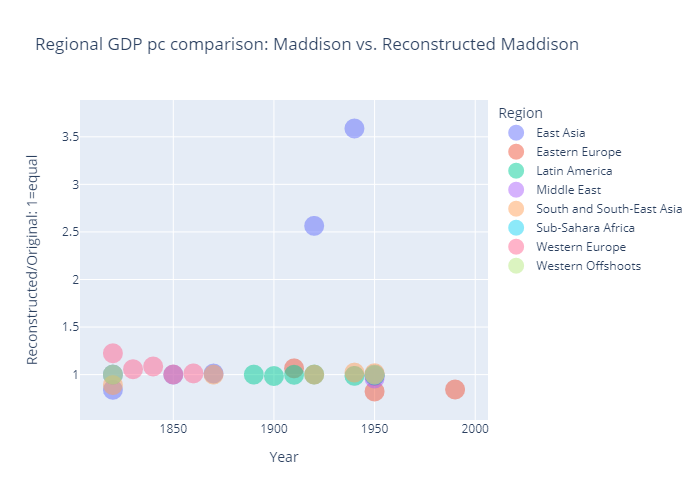

In [13]:
pio.renderers.default = "png+notebook_connected" #"png" for GitHub, "notebook_connected" for local analysis

fig = px.scatter(comparison, x="year", y="ratio", 
                 hover_data=['gdppc', 'gdp_per_capita'], opacity=0.5, color='region', 
                 title="Regional GDP pc comparison: Maddison vs. Reconstructed Maddison",
                 log_x=False,
                 log_y=False,
                labels={
                     "ratio": "Reconstructed/Original: 1=equal",
                     "year": "Year",
                     "region": "Region"
                 })

fig.update_traces(marker=dict(size=20, line=dict(width=0, color='blue')))
fig.show()

Two of the most clear differences are in for East Asia in 1940 (ratio 3.6) and 1920 (2.6), with a ratio of 2.56, which means the reconstruction is twice and three times the official estimates. For the case of 1920:

In [14]:
comparison[(comparison['region'] == 'East Asia') & (comparison['year'] == 1920)]

,year,region,gdp_sum,pop_sum,gdppc,country,gdp_per_capita,population,gdp,ratio
72,1920.0,East Asia,1.660006e+08,55818.0,2973.9623,East Asia,1160.0,543904000.0,6.309286e+11,2.563761


The big difference is explained by the lack of GDP pc data for China in 1920. East Asia in 1920 is defined as Japan and China:

In [15]:
mpd_withregions[(mpd_withregions['region'] == 'East Asia') & (mpd_withregions['year'] == 1920)]

,countrycode,country_x,year,gdppc,pop,country_y,region
3054,CHN,China,1920,NaN,472000.0,CHN,East Asia
10546,JPN,Japan,1920,2973.9623,55818.0,JPN,East Asia


In [16]:
mpd_withregions_notnull[(mpd_withregions_notnull['region'] == 'East Asia') & (mpd_withregions_notnull['year'] == 1920)]

,countrycode,country_x,year,gdppc,pop,country_y,region,gdp
158,JPN,Japan,1920,2973.9623,55818.0,JPN,East Asia,1.660006e+08


But this is not the only explanation to the differences, because for example Eastern Europe in 1950 is composed of five countries (Bulgaria, Cszechoslovakia, Hungary, Poland, Romania) and they all have data for 1950. The ratio is 0.82 though.

In [17]:
comparison[(comparison['region'] == 'Eastern Europe') & (comparison['year'] == 1950)]

,year,region,gdp_sum,pop_sum,gdppc,country,gdp_per_capita,population,gdp,ratio
89,1950.0,Eastern Europe,235393303.0,70112.5,3357.365705,Eastern Europe,4082.103027,265982000.0,1.085766e+12,0.82246


In [18]:
mpd_withregions[(mpd_withregions['region'] == 'Eastern Europe') & (mpd_withregions['year'] == 1950)]

,countrycode,country_x,year,gdppc,pop,country_y,region
1546,BGR,Bulgaria,1950,2632.0,7250.5,BGR,Eastern Europe
3886,CSK,Czechoslovakia,1950,5581.0,12389.0,CSK,Eastern Europe
8541,HUN,Hungary,1950,3953.0,9338.0,HUN,Eastern Europe
16118,POL,Poland,1950,3900.0,24824.0,POL,Eastern Europe
17258,ROU,Romania,1950,824.0,16311.0,ROU,Eastern Europe


In [19]:
#Exports the comparison

#comparison_excel = comparison[['year', 'region', 'gdp_sum', 'pop_sum', 'gdppc', 'gdp', 'population', 'gdp_per_capita', 'ratio']]
#comparison_excel = comparison_excel.dropna(subset=['ratio']).copy().reset_index(drop=True)

#file = Path('data/comparison.xlsx')
#comparison_excel.to_excel(file, index=False)

What is the reason for the difference then? For v2020 there is not information about how regional calculations are estimated, but at least for v2018 there is a [regional data file](https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.xlsx) which shows this:
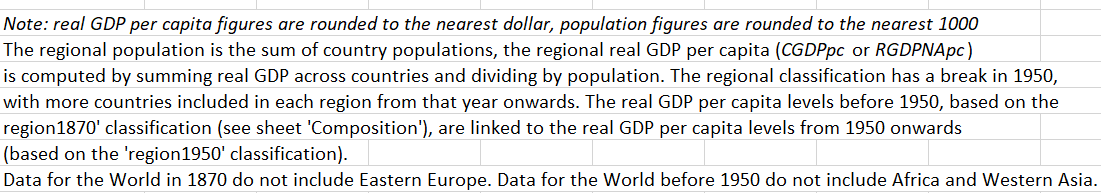

It is necessary then to estimate GDP growth values to apply them to the 1950 estimates. The variable `growth` estimates the difference between the GDP pc from one year and country and the value from the same country in the previous year.

In [20]:
for i in range(len(mpd)): #runs for the entire length of th dataframe
    country = mpd['countrycode'][i] #gets the country from row i
    year = mpd['year'][i] #gets the year from row i
    try:
        #gets the gdp from "country" the year before to "year"
        gdp_yearbefore = mpd.loc[(mpd['countrycode'] == country) & (mpd['year'] == year-1), 'gdppc'].iloc[0]
    except: #in case of error (no row available, no year before)
        gdp_yearbefore = None
    mpd.loc[i,'gdppc_yearbefore'] = gdp_yearbefore #assigns the gdp from the previous year to the following year's row
    
mpd['growth'] = mpd['gdppc']/mpd['gdppc_yearbefore']-1

In [21]:
regions1950 = mpd_regionalcomp[mpd_regionalcomp['year']==1950].copy().reset_index(drop=True)
mpd_1950 = pd.merge(mpd, regions1950[['country','region']], left_on='countrycode', right_on='country', how='left' )

In [22]:
mpd_over1950 = mpd_1950[mpd_1950['year']>=1950].copy().reset_index(drop=True)

mpd_over1950['gdp'] = mpd_over1950['gdppc'] * mpd_over1950['pop']

region_list = list(mpd_over1950['region'].unique())
region_list = [x for x in region_list if str(x) != 'nan']
region_list.sort()
year_list = list(mpd_over1950['year'].unique())
year_list.sort()

regionaldata_over = pd.DataFrame() #creates an empty dataframe to use it in the following interation

for i in year_list: #for each year with regional data
    db_peryear = mpd_over1950[mpd_over1950['year']==i].copy().reset_index(drop=True) #dataframe with data from country i
    
    for j in region_list:
        db_peryear_region = db_peryear[db_peryear['region']==j].copy().reset_index(drop=True)
        db_aux = pd.DataFrame()
    
        db_aux.loc[0,'year'] = i #assigns country i
        db_aux.loc[0,'region'] = j #assigns country i
        
        db_aux.loc[0,'gdp_sum'] = db_peryear_region['gdp'].sum()
        db_aux.loc[0,'pop_sum'] = db_peryear_region['pop'].sum()
        
        #regionaldata_over = regionaldata_over.append(db_aux, ignore_index=True)
        regionaldata_over = pd.concat([regionaldata_over, db_aux], ignore_index=True)
    
regionaldata_over['gdppc'] = regionaldata_over['gdp_sum']/regionaldata_over['pop_sum']
regionaldata_over.loc[regionaldata_over['region'] == 'South and South East Asia', 'region'] = 'South and South-East Asia'
regionaldata_over.loc[regionaldata_over['region'] == 'Sub Saharan Africa', 'region'] = 'Sub-Sahara Africa'
regionaldata_over

,year,region,gdp_sum,pop_sum,gdppc
0,1950.0,East Asia,7.540153e+08,6.817278e+05,1106.035835
1,1950.0,Eastern Europe,2.353933e+08,7.011250e+04,3357.365705
2,1950.0,Latin America,6.040478e+08,1.642172e+05,3678.345900
3,1950.0,Middle East,2.357803e+08,1.027425e+05,2294.865875
4,1950.0,South and South-East Asia,6.581309e+08,6.063336e+05,1085.427087
...,...,...,...,...,...
547,2018.0,Middle East,9.842624e+09,5.340620e+05,18429.740279
548,2018.0,South and South-East Asia,1.787251e+10,2.258966e+06,7911.809455
549,2018.0,Sub-Sahara Africa,3.558336e+09,1.016094e+06,3501.974117
550,2018.0,Western Europe,1.673635e+10,4.206180e+05,39789.896660


In [23]:
comparison = pd.merge(regionaldata_over, mpd_df_regions, left_on=['year','region'], right_on=['year','country'], how='left', validate='many_to_many')
comparison['ratio'] = comparison['gdppc']/comparison['gdp_per_capita']
comparison[['ratio']].describe()

,ratio
count,80.000000
mean,1.009805
std,0.069200
min,0.822460
25%,0.993088
50%,1.000000
75%,1.017085
max,1.281881


This ratio is also close to 1 on average, but there are also differences depending on the region:

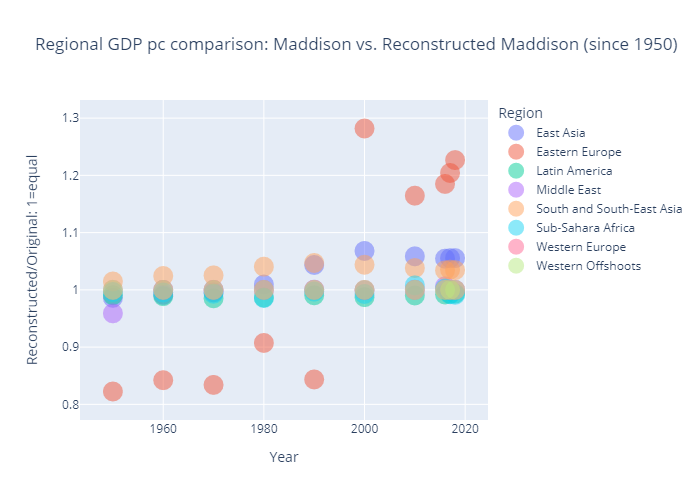

In [24]:
fig = px.scatter(comparison, x="year", y="ratio", 
                 hover_data=['gdppc', 'gdp_per_capita'], opacity=0.5, color='region', 
                 title="Regional GDP pc comparison: Maddison vs. Reconstructed Maddison (since 1950)",
                 log_x=False,
                 log_y=False,
                labels={
                     "ratio": "Reconstructed/Original: 1=equal",
                     "year": "Year",
                     "region": "Region"
                 })

fig.update_traces(marker=dict(size=20, line=dict(width=0, color='blue')))
fig.show()

In [25]:
mpd_withregions = pd.merge(mpd, mpd_regionalcomp, left_on=['countrycode','year'], right_on=['country','year'], how='left', validate='many_to_many')
mpd_withregions_notnull = mpd_withregions[~mpd_withregions['region'].isnull()].copy().reset_index(drop=True)
mpd_withregions_notnull = mpd_withregions_notnull.dropna(subset=['gdppc', 'pop']).copy().reset_index(drop=True)

In [26]:
regions1940 = mpd_regionalcomp[mpd_regionalcomp['year']==1940].copy().reset_index(drop=True)
mpd_1940 = pd.merge(mpd, regions1940[['country','region']], left_on='countrycode', right_on='country', how='left' )

In [27]:
mpd_below1950 = mpd_1940[(mpd_1940['year']>=1940) & (mpd_1940['year']<1950)].copy().reset_index(drop=True)

mpd_below1950['gdp'] = mpd_below1950['gdppc'] * mpd_below1950['pop']

region_list = list(mpd_below1950['region'].unique())
region_list = [x for x in region_list if str(x) != 'nan']
region_list.sort()
year_list = list(mpd_below1950['year'].unique())
year_list.sort()

regionaldata_below = pd.DataFrame() #creates an empty dataframe to use it in the following interation
    
for i in year_list: #for each year with regional data
    db_peryear = mpd_below1950[mpd_below1950['year']==i].copy().reset_index(drop=True) #dataframe with data from country i
    
    for j in region_list:
        db_peryear_region = db_peryear[db_peryear['region']==j].copy().reset_index(drop=True)
        db_aux = pd.DataFrame()
    
        db_aux.loc[0,'year'] = i #assigns country i
        db_aux.loc[0,'region'] = j #assigns country i
        
        db_aux.loc[0,'gdp_sum'] = db_peryear_region['gdp'].sum()
        db_aux.loc[0,'pop_sum'] = db_peryear_region['pop'].sum()
        #db_aux.loc[0,'growth_avg'] = db_peryear_region['growth'].mean()
        
        #regionaldata_over = regionaldata_over.append(db_aux, ignore_index=True)
        regionaldata_below = pd.concat([regionaldata_below, db_aux], ignore_index=True)
    
regionaldata_below['gdppc'] = regionaldata_below['gdp_sum']/regionaldata_below['pop_sum']
regionaldata_below.loc[regionaldata_below['region'] == 'South and South East Asia', 'region'] = 'South and South-East Asia'
regionaldata_below.loc[regionaldata_below['region'] == 'Sub Saharan Africa', 'region'] = 'Sub-Sahara Africa'
regionaldata_below

,year,region,gdp_sum,pop_sum,gdppc
0,1940.0,East Asia,3.562540e+08,591737.0,602.047821
1,1940.0,Latin America,3.582940e+08,120055.0,2984.415218
2,1940.0,South and South-East Asia,6.172578e+08,490080.0,1259.504244
3,1941.0,East Asia,3.690067e+08,595513.0,619.645064
4,1941.0,Latin America,3.762956e+08,122685.0,3067.168611
5,1941.0,South and South-East Asia,5.914429e+08,496682.0,1190.787929
6,1942.0,East Asia,3.705337e+08,599290.0,618.287837
7,1942.0,Latin America,3.765797e+08,125423.0,3002.477201
8,1942.0,South and South-East Asia,4.567673e+08,502037.0,909.827927
9,1943.0,East Asia,3.667735e+08,603033.0,608.214688


In [28]:
for i in range(len(regionaldata_below)): #runs for the entire length of th dataframe
    region = regionaldata_below['region'][i] #gets the country from row i
    year = regionaldata_below['year'][i] #gets the year from row i
    try:
        #gets the gdp from "country" the year before to "year"
        gdp_yearbefore = regionaldata_below.loc[(regionaldata_below['region'] == region) & (regionaldata_below['year'] == year-1), 'gdppc'].iloc[0]
    except: #in case of error (no row available, no year before)
        gdp_yearbefore = None
    regionaldata_below.loc[i,'gdppc_yearbefore'] = gdp_yearbefore #assigns the gdp from the previous year to the following year's row
    
regionaldata_below['growth'] = regionaldata_below['gdppc']/regionaldata_below['gdppc_yearbefore']-1

In [29]:
regionaldata_below

,year,region,gdp_sum,pop_sum,gdppc,gdppc_yearbefore,growth
0,1940.0,East Asia,3.562540e+08,591737.0,602.047821,NaN,NaN
1,1940.0,Latin America,3.582940e+08,120055.0,2984.415218,NaN,NaN
2,1940.0,South and South-East Asia,6.172578e+08,490080.0,1259.504244,NaN,NaN
3,1941.0,East Asia,3.690067e+08,595513.0,619.645064,602.047821,0.029229
4,1941.0,Latin America,3.762956e+08,122685.0,3067.168611,2984.415218,0.027729
5,1941.0,South and South-East Asia,5.914429e+08,496682.0,1190.787929,1259.504244,-0.054558
6,1942.0,East Asia,3.705337e+08,599290.0,618.287837,619.645064,-0.002190
7,1942.0,Latin America,3.765797e+08,125423.0,3002.477201,3067.168611,-0.021092
8,1942.0,South and South-East Asia,4.567673e+08,502037.0,909.827927,1190.787929,-0.235945
9,1943.0,East Asia,3.667735e+08,603033.0,608.214688,618.287837,-0.016292


In [30]:
region_list = list(regionaldata_below['region'].unique())
region_list = [x for x in region_list if str(x) != 'nan']
region_list.sort()

regionaldata_1940 = pd.DataFrame()

for j in region_list:
    db_peryear_region = regionaldata_below[regionaldata_below['region']==j].copy().reset_index(drop=True)
    db_aux = pd.DataFrame()

    db_aux.loc[0,'year'] = 1940 #assigns country i
    db_aux.loc[0,'region'] = j #assigns country i

    db_aux.loc[0,'gdp_sum'] = db_peryear_region['gdp_sum'].sum()
    db_aux.loc[0,'pop_sum'] = db_peryear_region['pop_sum'].sum()
    db_aux.loc[0,'growth_avg'] = db_peryear_region['growth'].mean()

    regionaldata_1940 = pd.concat([regionaldata_1940, db_aux], ignore_index=True)

In [31]:
regionaldata_both = pd.concat([regionaldata_1940, regionaldata_over], ignore_index=True)
regionaldata_both

,year,region,gdp_sum,pop_sum,growth_avg,gdppc
0,1940.0,East Asia,3.004329e+09,6.081524e+06,-0.044095,NaN
1,1940.0,Latin America,4.367041e+09,1.331517e+06,0.023920,NaN
2,1940.0,South and South-East Asia,4.766039e+09,4.946201e+06,-0.009821,NaN
3,1950.0,East Asia,7.540153e+08,6.817278e+05,NaN,1106.035835
4,1950.0,Eastern Europe,2.353933e+08,7.011250e+04,NaN,3357.365705
...,...,...,...,...,...,...
550,2018.0,Middle East,9.842624e+09,5.340620e+05,NaN,18429.740279
551,2018.0,South and South-East Asia,1.787251e+10,2.258966e+06,NaN,7911.809455
552,2018.0,Sub-Sahara Africa,3.558336e+09,1.016094e+06,NaN,3501.974117
553,2018.0,Western Europe,1.673635e+10,4.206180e+05,NaN,39789.896660


In [32]:
east_asia_1950 = regionaldata_both.loc[(regionaldata_both['region'] == 'East Asia') & (regionaldata_both['year'] == 1950),
                                       'gdppc'].iloc[0]
latin_america_1950 = regionaldata_both.loc[(regionaldata_both['region'] == 'Latin America') & (regionaldata_both['year'] == 1950),
                                       'gdppc'].iloc[0]
southeast_asia_1950 = regionaldata_both.loc[(regionaldata_both['region'] == 'South and South-East Asia') & (regionaldata_both['year'] == 1950),
                                       'gdppc'].iloc[0]

east_asia_growth1940 = regionaldata_both.loc[(regionaldata_both['region'] == 'East Asia') & (regionaldata_both['year'] == 1940),
                                       'growth_avg'].iloc[0]
latin_america_growth1940 = regionaldata_both.loc[(regionaldata_both['region'] == 'Latin America') & (regionaldata_both['year'] == 1940),
                                       'growth_avg'].iloc[0]
southeast_asia_growth1940 = regionaldata_both.loc[(regionaldata_both['region'] == 'South and South-East Asia') & (regionaldata_both['year'] == 1940),
                                       'growth_avg'].iloc[0]

regionaldata_both.loc[(regionaldata_both['region'] == 'East Asia') & (regionaldata_both['year'] == 1940),'gdppc'] = east_asia_1950/(1+east_asia_growth1940)
regionaldata_both.loc[(regionaldata_both['region'] == 'Latin America') & (regionaldata_both['year'] == 1940),'gdppc'] = latin_america_1950/(1+latin_america_growth1940)
regionaldata_both.loc[(regionaldata_both['region'] == 'South and South-East Asia') & (regionaldata_both['year'] == 1940),'gdppc'] = southeast_asia_1950/(1+southeast_asia_growth1940)

In [33]:
comparison = pd.merge(regionaldata_both, mpd_df_regions, left_on=['year','region'], right_on=['year','country'], how='left', validate='many_to_many')
comparison['ratio'] = comparison['gdppc']/comparison['gdp_per_capita']
comparison[['ratio']].describe()

,ratio
count,83.000000
mean,1.008555
std,0.074105
min,0.822460
25%,0.992601
50%,1.000000
75%,1.019482
max,1.281881


This ratio is also close to 1 on average, but there are also differences depending on the region:

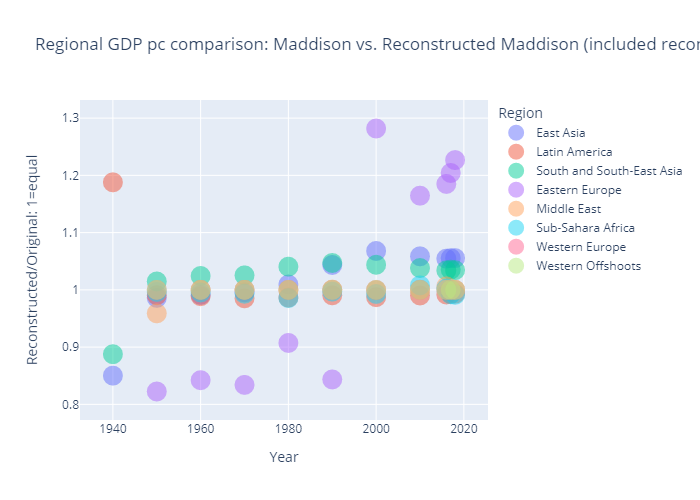

In [34]:
fig = px.scatter(comparison, x="year", y="ratio", 
                 hover_data=['gdppc', 'gdp_per_capita'], opacity=0.5, color='region', 
                 title="Regional GDP pc comparison: Maddison vs. Reconstructed Maddison (included reconstructed 1940)",
                 log_x=False,
                 log_y=False,
                labels={
                     "ratio": "Reconstructed/Original: 1=equal",
                     "year": "Year",
                     "region": "Region"
                 })

fig.update_traces(marker=dict(size=20, line=dict(width=0, color='blue')))
fig.show()

For 1940 there are still differences with the official estimation, so this method is not the one they use

**Discarded**: Data manipulation is necessary for the MDP coming from `catalog` to be merged with the rest of datasets

In [35]:
mpd_join = pd.merge(mpd_df, mpd[['country','countrycode']], on='country', how='left',validate='many_to_many' )
mpd_join_nullcode = mpd_join[mpd_join['countrycode'].isnull()].copy().reset_index(drop=True)

In [36]:
#Countries with no country code in mpd_df 
mpd_join_nullcode['country'].unique()

array(['Bolivia', 'Cape Verde', "Cote d'Ivoire", 'Czechia',
       'Democratic Republic of Congo', 'East Asia', 'Eastern Europe',
       'Eswatini', 'Former Sudan', 'Hong Kong', 'Iran', 'Laos',
       'Latin America', 'Middle East', 'Moldova', 'North Korea',
       'North Macedonia', 'Palestine', 'Russia', 'South Korea',
       'South and South-East Asia', 'Sub-Sahara Africa', 'Syria',
       'Taiwan', 'Tanzania', 'USSR', 'Venezuela', 'Vietnam',
       'Western Europe', 'Western Offshoots', 'World', 'Yugoslavia'],
      dtype=object)

In [37]:
#Adding the missing country codes
mpd_join.loc[mpd_join['country'] == 'Bolivia', 'countrycode'] = 'BOL'
mpd_join.loc[mpd_join['country'] == 'Cape Verde', 'countrycode'] = 'CPV'
mpd_join.loc[mpd_join['country'] == "Cote d'Ivoire", 'countrycode'] = 'CIV'
mpd_join.loc[mpd_join['country'] == 'Czechia', 'countrycode'] = 'CZE'
mpd_join.loc[mpd_join['country'] == 'Democratic Republic of Congo', 'countrycode'] = 'COD'
mpd_join.loc[mpd_join['country'] == 'Eswatini', 'countrycode'] = 'SWZ'
mpd_join.loc[mpd_join['country'] == 'Former Sudan', 'countrycode'] = 'SDN'
mpd_join.loc[mpd_join['country'] == 'Hong Kong', 'countrycode'] = 'HKG'
mpd_join.loc[mpd_join['country'] == 'Iran', 'countrycode'] = 'IRN'
mpd_join.loc[mpd_join['country'] == 'Laos', 'countrycode'] = 'LAO'
mpd_join.loc[mpd_join['country'] == 'Moldova', 'countrycode'] = 'MDA'
mpd_join.loc[mpd_join['country'] == 'North Korea', 'countrycode'] = 'PRK'
mpd_join.loc[mpd_join['country'] == 'North Macedonia', 'countrycode'] = 'MKD'
mpd_join.loc[mpd_join['country'] == 'Palestine', 'countrycode'] = 'PSE'
mpd_join.loc[mpd_join['country'] == 'Russia', 'countrycode'] = 'RUS'
mpd_join.loc[mpd_join['country'] == 'South Korea', 'countrycode'] = 'KOR'
mpd_join.loc[mpd_join['country'] == 'Syria', 'countrycode'] = 'SYR'
mpd_join.loc[mpd_join['country'] == 'Taiwan', 'countrycode'] = 'TWN'
mpd_join.loc[mpd_join['country'] == 'Tanzania', 'countrycode'] = 'TZA'
mpd_join.loc[mpd_join['country'] == 'USSR', 'countrycode'] = 'SUN'
mpd_join.loc[mpd_join['country'] == 'Venezuela', 'countrycode'] = 'VEN'
mpd_join.loc[mpd_join['country'] == 'Vietnam', 'countrycode'] = 'VNM'
mpd_join.loc[mpd_join['country'] == 'Yugoslavia', 'countrycode'] = 'YUG'
mpd_join

,country,year,gdp_per_capita,population,gdp,countrycode
0,Afghanistan,1820,NaN,3280000.0,NaN,AFG
1,Afghanistan,1820,NaN,3280000.0,NaN,AFG
2,Afghanistan,1820,NaN,3280000.0,NaN,AFG
3,Afghanistan,1820,NaN,3280000.0,NaN,AFG
4,Afghanistan,1820,NaN,3280000.0,NaN,AFG
...,...,...,...,...,...,...
5298227,Zimbabwe,2018,1611.405151,14096612.0,2.271535e+10,ZWE
5298228,Zimbabwe,2018,1611.405151,14096612.0,2.271535e+10,ZWE
5298229,Zimbabwe,2018,1611.405151,14096612.0,2.271535e+10,ZWE
5298230,Zimbabwe,2018,1611.405151,14096612.0,2.271535e+10,ZWE
